In [ ]:
!pip install control

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction, step_response, bode_plot,
                     feedback, sisotool,rlocus)

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 16 # tamanho da letra

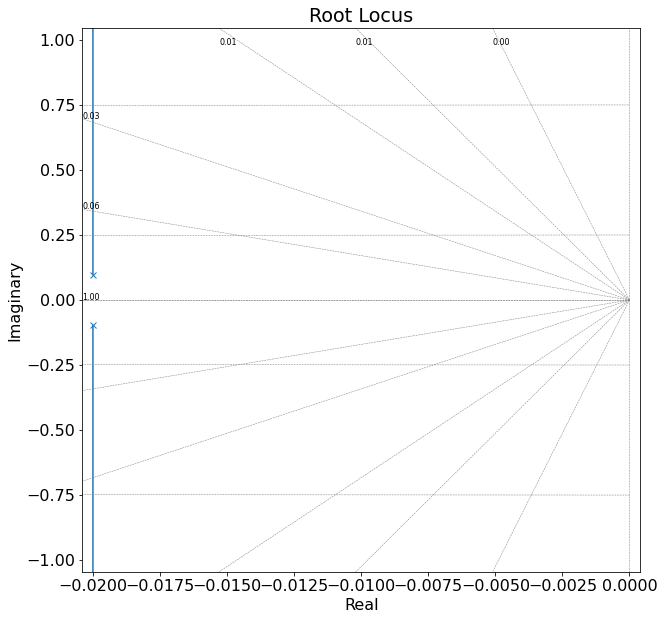

In [21]:
# sistema a ser controlado com fator de amortecimento baixo e freq. natural baixa (sistema lento)

wo = 0.1 # freq. natural 
zetao = 0.2 # fator de amortecimento
H = TransferFunction(wo**2, [1, 2 * zetao * wo, wo**2])
roots, gains = ctl.rlocus(H)

# sistema sem ganho critico -> não dá pra usar Ziegler Nichols

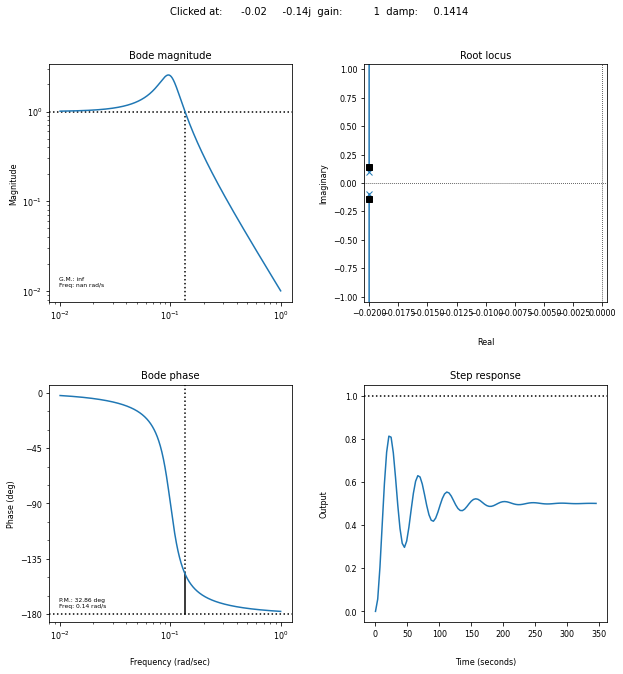

In [22]:
# sistema lento com erro de regime
# observar que a freq. de corte é 0.14 rad/s, o tempo de acomodação 200s e o erro de regime
ctl.sisotool(H)

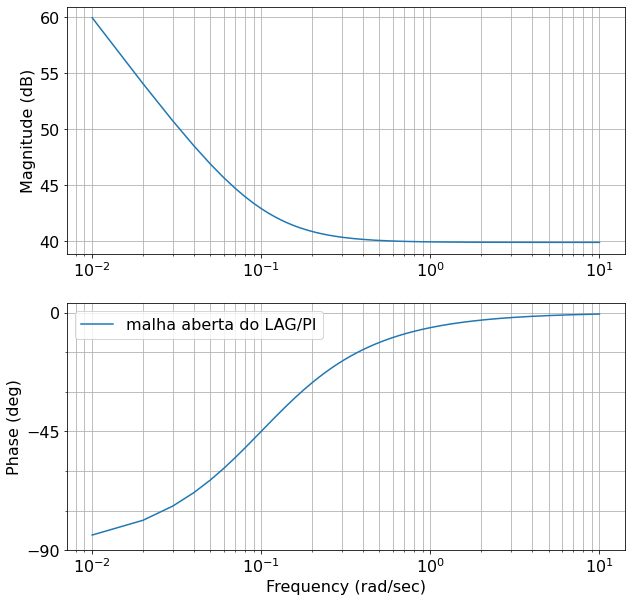

In [23]:
# eliminar o erro de regime com ação integral
#  compensador em atraso / PI

ko = 98.6;
Ti = 10;

LAG = ko * TransferFunction([Ti, 1], [Ti, 0])
w = np.linspace(0.01, 10, 1001)

plt.figure()  # Malha aberta / reparar na frequencia de corte
mag, phase, omega = bode_plot(LAG, omega = w, dB = True)
plt.legend(["malha aberta do LAG/PI"])
plt.show()

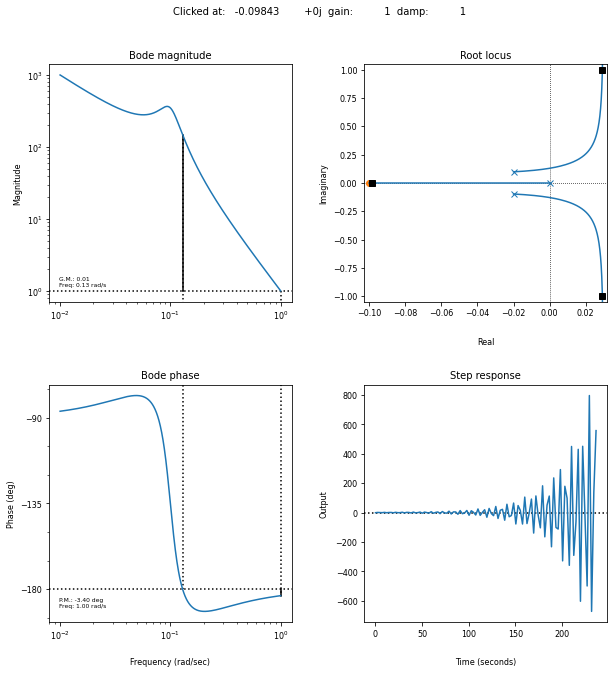

In [24]:
# compensador em atraso / PI + sistema a ser controlado
# observar que a freq. de corte é 1.0 rad/s, mas o sistema é instável
MA_lag = LAG * H # malha aberta 
ctl.sisotool(MA_lag)

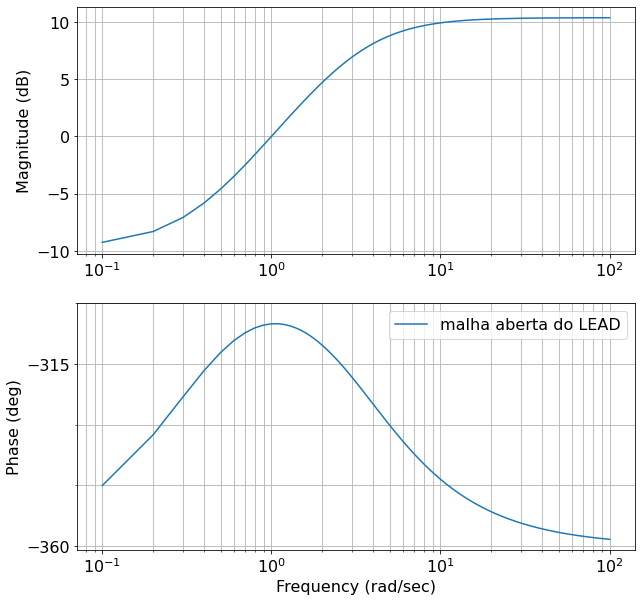

In [25]:
# melhorar a fase para deixar o sistema estável
# compensador em avanço

Td = 3
k = 3.3
alpha = 0.1;
LEAD = k * alpha * TransferFunction([Td, 1], [Td * alpha, 1])
w = np.linspace(0.1, 100, 1001)

plt.figure()  # Malha aberta / reparar na frequencia de corte
mag, phase, omega = bode_plot(LEAD, omega = w, dB = True)
plt.legend(["malha aberta do LEAD"])
plt.show()

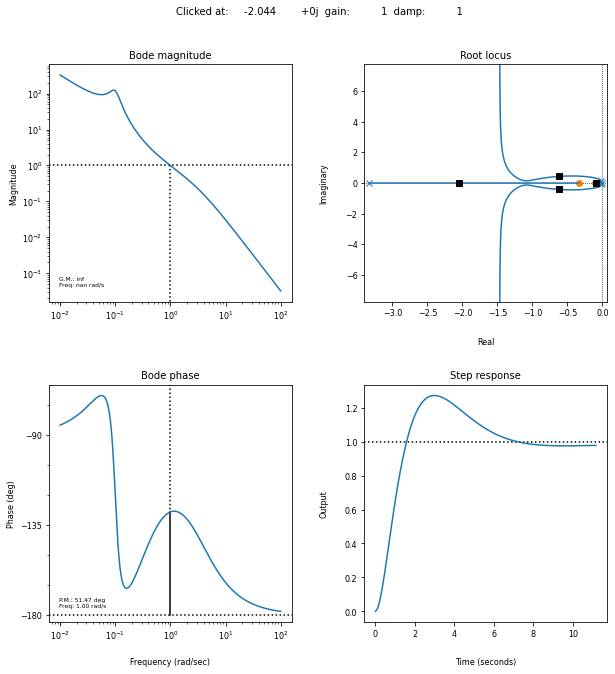

In [26]:
# compensador em avanço + PI + sistema a ser controlado
# observar que a freq. de corte é 1.0 rad/s, o sistema é estável e o tempo de acomodação é de 10s

MA_leadlag = LEAD * LAG * H # malha aberta 
ctl.sisotool(MA_leadlag)

In [30]:
# Função Transferência da malha fechada
MF_leadlag = feedback(MA_leadlag, 1) # malha fechada
print(MF_leadlag)



          9.761 s^2 + 4.23 s + 0.3254
-----------------------------------------------
3 s^4 + 10.12 s^3 + 10.19 s^2 + 4.33 s + 0.3254



<function matplotlib.pyplot.show(*args, **kw)>

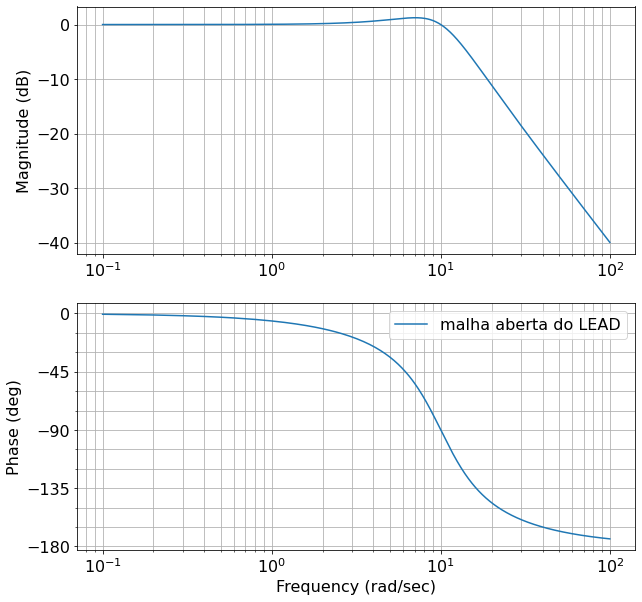

In [31]:
# se necessário eliminar ruído um filtro roll-off pode ser adicionado
# roll-off

w1 = 10
qsi1 = 0.5
ROLL = TransferFunction(w1**2, [1, 2* qsi1 * w1, w1**2]) # filtro de segunda ordem bem amortecido

plt.figure()  # Malha aberta / reparar na frequência de corte 10X a 1rad/s
mag, phase, omega = bode_plot(ROLL, omega=w, dB=True)
plt.legend(["malha aberta do LEAD"])
plt.show



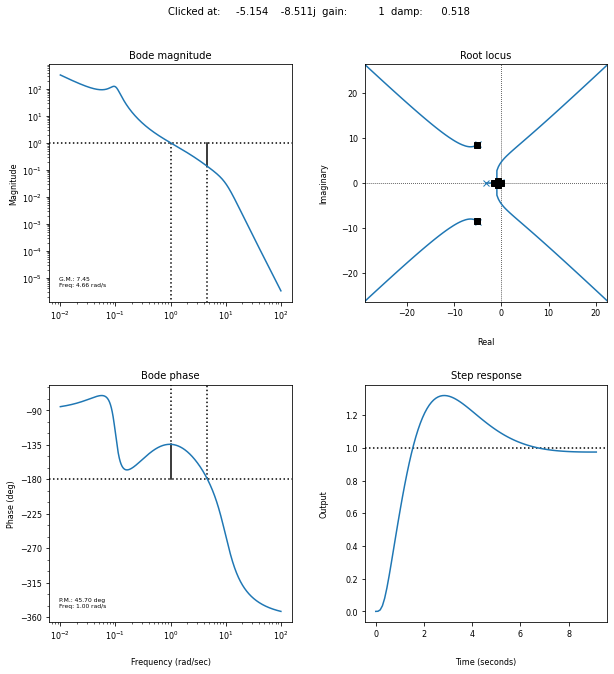

In [32]:
# compensador em avanço + PI + + ROLL + sistema a ser controlado
# observar que a freq. de corte é 1.0 rad/s, o sistema é estável e o tempo de acomodação é de 8s

MA_ROLL = MA_leadlag * ROLL

ctl.sisotool(MA_ROLL)

In [ ]:
# controlador que deve ser implementado 
COMP = LEAD * LAG * ROLL
print('CMP =', COMP)

CMP = 
9.761e+04 s^2 + 4.23e+04 s + 3254
---------------------------------
3 s^4 + 40 s^3 + 400 s^2 + 1000 s

